<a href="https://colab.research.google.com/github/duongn169/duongn169/blob/main/Train_MonAnVN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
from tensorflow.python.keras.utils.data_utils import Sequence
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_path = '/content/drive/MyDrive/MonanVN'
valid_path = '/content/drive/MyDrive/MonanVN'
test_path = '/content/drive/MyDrive/MonanVN'

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40,
                                   width_shift_range=0.2, height_shift_range=0.2,
                                   shear_range=0.2, zoom_range=0.2,
                                   horizontal_flip=True, fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)
train_batches = train_datagen.flow_from_directory(train_path, target_size=(224, 224), 
                                                  batch_size=10, class_mode='categorical')

validation_batches = test_datagen.flow_from_directory(valid_path, target_size=(224, 224),
                                                      batch_size=10, class_mode='categorical')

test_batches = test_datagen.flow_from_directory(test_path, target_size=(224, 224),
                                                batch_size=10, class_mode='categorical')

Found 200 images belonging to 10 classes.
Found 200 images belonging to 10 classes.
Found 200 images belonging to 10 classes.


In [5]:
imgs, labels = next(train_batches)
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [6]:
model = Sequential([
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Dropout(0.2),
    Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding = 'same'),
    Flatten(),
    Dropout(0.5),
    Dense(units=10, activation='softmax')])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 256)      0

In [7]:
model.compile(optimizer=Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x=train_batches, steps_per_epoch=len(train_batches), validation_data=validation_batches,
          validation_steps=len(validation_batches), epochs=200, verbose=1)

Epoch 1/200
20/20 [==============================] - 141s 6s/step - loss: 2.3720 - accuracy: 0.1100 - val_loss: 2.3009 - val_accuracy: 0.1300
Epoch 2/200
20/20 [==============================] - 7s 346ms/step - loss: 2.3006 - accuracy: 0.1000 - val_loss: 2.2724 - val_accuracy: 0.1850
Epoch 3/200
20/20 [==============================] - 7s 342ms/step - loss: 2.2820 - accuracy: 0.2050 - val_loss: 2.1361 - val_accuracy: 0.3050
Epoch 4/200
20/20 [==============================] - 7s 344ms/step - loss: 2.1375 - accuracy: 0.2250 - val_loss: 2.0671 - val_accuracy: 0.2350
Epoch 5/200
20/20 [==============================] - 7s 342ms/step - loss: 2.1125 - accuracy: 0.2400 - val_loss: 2.0112 - val_accuracy: 0.2500
Epoch 6/200
20/20 [==============================] - 7s 346ms/step - loss: 1.9896 - accuracy: 0.2700 - val_loss: 1.7876 - val_accuracy: 0.3750
Epoch 7/200
20/20 [==============================] - 7s 344ms/step - loss: 1.9046 - accuracy: 0.3350 - val_loss: 1.5855 - val_accuracy: 0.4650


In [8]:
model.save('Train_MonAnVN.h5')

In [9]:
classes = ['Bundau','banhbeo','banhchung','banhcuon','banhmi','bunbohue','caolau','chamuchalong','duongdua','nemnuong']
print("Image Processing.......Compleated")

Image Processing.......Compleated


Saving foody-mobile-107-jpg-579-635751710750759607.jpg to foody-mobile-107-jpg-579-635751710750759607.jpg
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
Giá trị dự đoán:  bunbohue


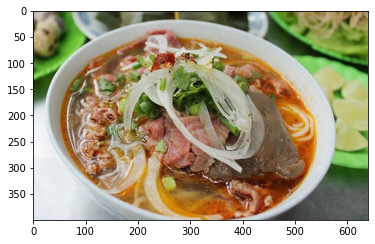

In [10]:
from google.colab import files
from keras.preprocessing import image
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

uploaded=files.upload()

for fn in uploaded.keys():
  #predicting images
  path='/content/'+fn
  #In ảnh đọc được
  plt.imshow(mpimg.imread(path))

  img=image.load_img(path,target_size=(224,224))
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images=np.vstack([x])
  y_predict = model.predict(images,batch_size=200000)
  print(y_predict)
  print('Giá trị dự đoán: ', classes[np.argmax(y_predict)])